<a href="https://colab.research.google.com/github/Karnikasri/Stock_Price_Movement_Prediction/blob/main/Stock_Price_Movement_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock Price Movement Prediction
------------------------------
Downloaded 1257 rows of data


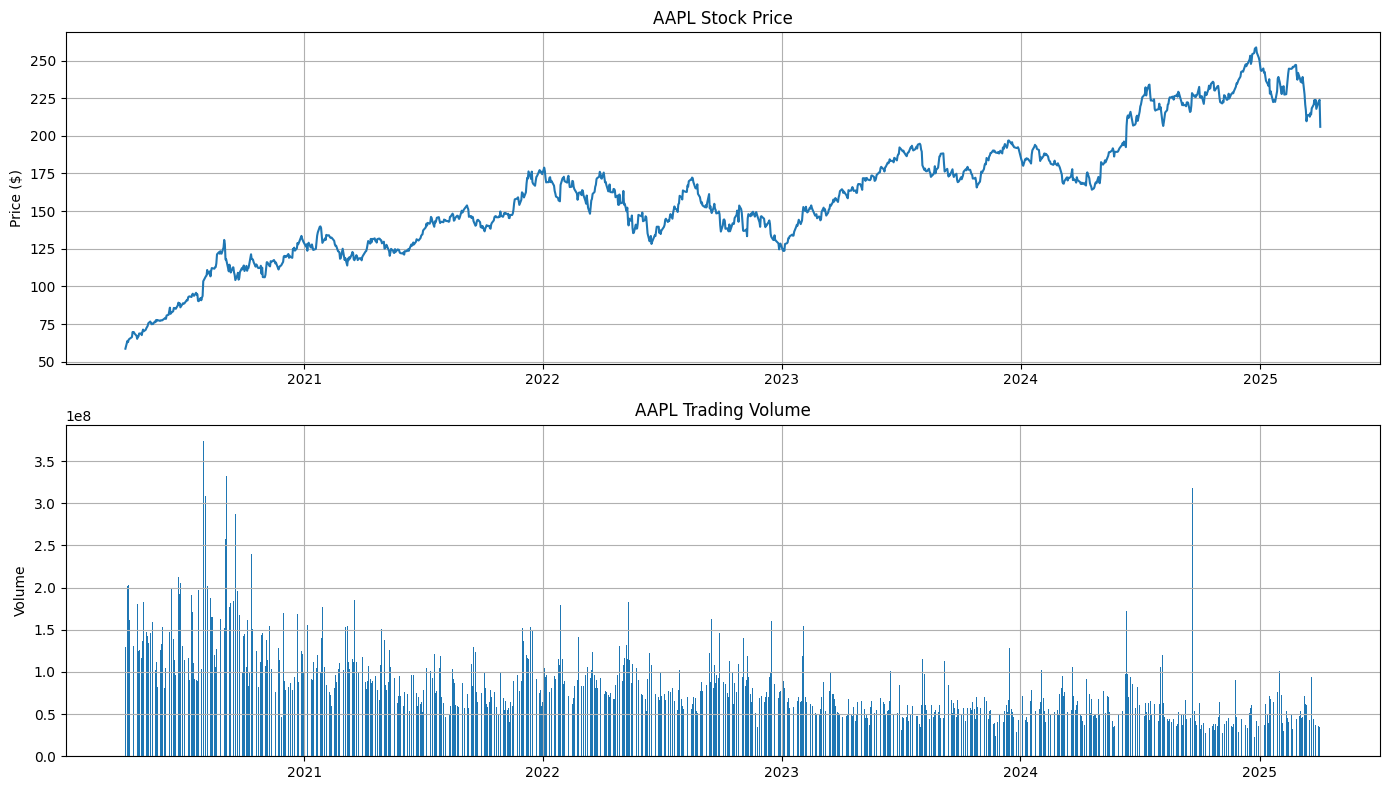

Created features. Data shape: (1238, 20)
Prepared sequences. X shape: (1178, 60, 9), y shape: (1178,)
Train shapes: X_train (942, 60, 9), y_train (942,)
Test shapes: X_test (236, 60, 9), y_test (236,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 100)             │          44,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,501 (294.93 KB)

 Trainable params: 75,501 (294.93 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.5267 - loss: 0.6966 - val_accuracy: 0.4211 - val_loss: 0.7013
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.5229 - loss: 0.6927 - val_accuracy: 0.4211 - val_loss: 0.6999
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5381 - loss: 0.6912 - val_accuracy: 0.4211 - val_loss: 0.7034
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5253 - loss: 0.6911 - val_accuracy: 0.4211 - val_loss: 0.7158
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5103 - loss: 0.6949 - val_accuracy: 0.4211 - val_loss: 0.7045
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5192 - loss: 0.6932 - val_accuracy: 0.4526 - val_loss: 0.6943
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5229 - loss: 0.6922 - val_accuracy: 0.4211 - val_loss: 0.7070
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5232 - loss: 0.6906 - val_accuracy: 0.4

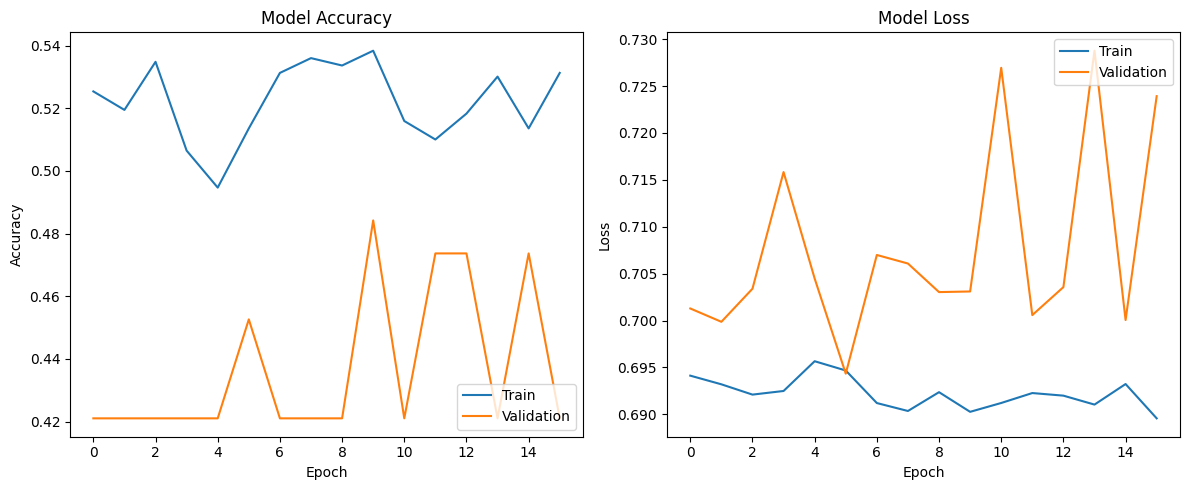

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Accuracy: 0.5085

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.62      0.51        97
           1       0.62      0.43      0.51       139

    accuracy                           0.51       236
   macro avg       0.53      0.53      0.51       236
weighted avg       0.54      0.51      0.51       236



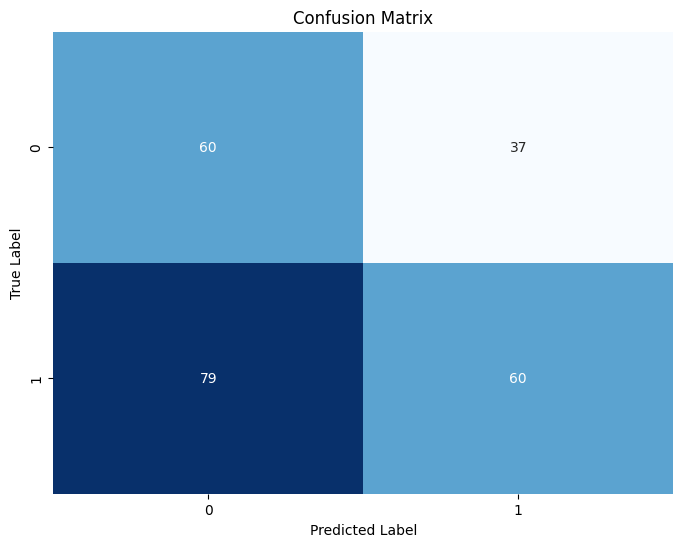

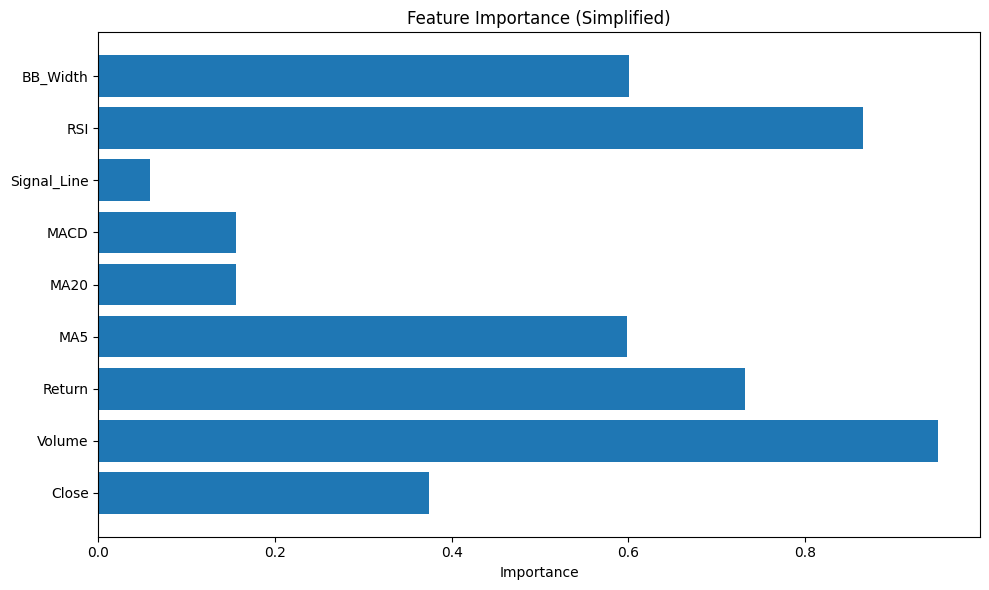

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Prediction for the next trading day:
The model predicts the stock price will GO UP with 52.00% confidence


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import yfinance as yf
from datetime import datetime, timedelta
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

np.random.seed(42)
tf.random.set_seed(42)

def get_stock_data(ticker, period='5y'):
    print(f"Downloading data for {ticker}...")
    stock = yf.Ticker(ticker)
    df = stock.history(period=period)
    if df.empty:
        raise ValueError(f"No data found for ticker {ticker}")

    print(f"Downloaded {len(df)} rows of data")
    return df

def create_features(df):
    data = df.copy()
    data['Return'] = data['Close'].pct_change()
    data['MA5'] = data['Close'].rolling(window=5).mean()
    data['MA20'] = data['Close'].rolling(window=20).mean()
    data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
    data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
    data['MACD'] = data['EMA12'] - data['EMA26']
    data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

    data['20d_std'] = data['Close'].rolling(window=20).std()
    data['Upper_Band'] = data['MA20'] + (data['20d_std'] * 2)
    data['Lower_Band'] = data['MA20'] - (data['20d_std'] * 2)
    data['BB_Width'] = (data['Upper_Band'] - data['Lower_Band']) / data['MA20']

    data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)

    data = data.dropna()
    return data


def preprocess_data(data, lookback=60):
    features = ['Close', 'Volume', 'Return', 'MA5', 'MA20', 'MACD', 'Signal_Line', 'RSI', 'BB_Width']
    X = data[features].values
    y = data['Target'].values
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    X_sequences = []
    y_sequences = []

    for i in range(len(X_scaled) - lookback):
        X_sequences.append(X_scaled[i:i+lookback])
        y_sequences.append(y[i+lookback])

    return np.array(X_sequences), np.array(y_sequences), scaler, features

def build_lstm_model(input_shape, dropout_rate=0.2):
    model = Sequential([
        LSTM(100, return_sequences=True, input_shape=input_shape),
        Dropout(dropout_rate),
        LSTM(50, return_sequences=False),
        Dropout(dropout_rate),
        Dense(25, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

def plot_stock_data(data, ticker):
    plt.figure(figsize=(14, 8))
    ax1 = plt.subplot(2, 1, 1)
    ax1.plot(data.index, data['Close'])
    ax1.set_title(f'{ticker} Stock Price')
    ax1.set_ylabel('Price ($)')
    ax1.grid(True)

    ax2 = plt.subplot(2, 1, 2)
    ax2.bar(data.index, data['Volume'])
    ax2.set_title(f'{ticker} Trading Volume')
    ax2.set_ylabel('Volume')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def plot_feature_importance(model, feature_names):
    importances = np.random.random(len(feature_names))
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, importances)
    plt.title('Feature Importance (Simplified)')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

def main():
    ticker = 'AAPL'
    lookback = 60
    test_size = 0.2
    epochs = 50
    batch_size = 32

    print("Stock Price Movement Prediction")
    print("-" * 30)

    df = get_stock_data(ticker)
    plot_stock_data(df, ticker)
    data = create_features(df)
    print(f"Created features. Data shape: {data.shape}")
    X_sequences, y_sequences, scaler, features = preprocess_data(data, lookback)
    print(f"Prepared sequences. X shape: {X_sequences.shape}, y shape: {y_sequences.shape}")
    X_train, X_test, y_train, y_test = train_test_split(
        X_sequences, y_sequences, test_size=test_size, shuffle=False
    )
    print(f"Train shapes: X_train {X_train.shape}, y_train {y_train.shape}")
    print(f"Test shapes: X_test {X_test.shape}, y_test {y_test.shape}")

    input_shape = (X_train.shape[1], X_train.shape[2])
    model = build_lstm_model(input_shape)
    print(model.summary())

    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.1,
        callbacks=[
            tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True
            )
        ],
        verbose=1
    )

    plot_training_history(history)
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    plot_confusion_matrix(y_test, y_pred)
    plot_feature_importance(model, features)
    last_sequence = X_sequences[-1].reshape(1, lookback, len(features))
    next_day_prediction = model.predict(last_sequence)[0][0]

    print("\nPrediction for the next trading day:")
    if next_day_prediction > 0.5:
        print(f"The model predicts the stock price will GO UP with {next_day_prediction:.2%} confidence")
    else:
        print(f"The model predicts the stock price will GO DOWN with {(1-next_day_prediction):.2%} confidence")

if __name__ == "__main__":
    try:
        main()
    except Exception as e:
        print(f"An error occurred: {e}")